In [1]:


import warnings
warnings.filterwarnings('ignore')

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)

from hyperopt import fmin, tpe, rand, hp, Trials, STATUS_OK
from hyperopt import SparkTrials
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
!pip install mlflow
!pip install xgboost
import mlflow
import mlflow.xgboost
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 18.2 MB/s eta 0:00:00


In [31]:
df= pd.read_csv('/content/Campaign_Effectiveness_1_data.csv')

In [32]:
df

,region,year,month,day,num_visits,date,banner_imp,social_media_like,landing_page_visit,google_trend
0,NY,2019,1,1,467,2019-01-01,510311,9,400.000000,82
1,NY,2019,1,2,686,2019-01-02,530804,13,400.000000,82
2,NY,2019,1,3,788,2019-01-03,590964,22,400.000000,82
3,NY,2019,1,4,807,2019-01-04,229922,17,400.000000,82
4,NY,2019,1,5,544,2019-01-05,341907,11,400.000000,82
...,...,...,...,...,...,...,...,...,...,...
420,NY,2020,2,25,452,2020-02-25,251162,14,449.285714,76
421,NY,2020,2,26,787,2020-02-26,396033,15,454.714286,76
422,NY,2020,2,27,706,2020-02-27,177687,17,452.000000,76
423,NY,2020,2,28,710,2020-02-28,424963,12,453.428571,76


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   region              425 non-null    object 
 1   year                425 non-null    int64  
 2   month               425 non-null    int64  
 3   day                 425 non-null    int64  
 4   num_visits          425 non-null    int64  
 5   date                425 non-null    object 
 6   banner_imp          425 non-null    int64  
 7   social_media_like   425 non-null    int64  
 8   landing_page_visit  425 non-null    float64
 9   google_trend        425 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 33.3+ KB


In [34]:
df.isna().sum()

,0
region,0
year,0
month,0
day,0
num_visits,0
date,0
banner_imp,0
social_media_like,0
landing_page_visit,0
google_trend,0


In [35]:
print(df.duplicated().sum())

0


In [36]:
df.describe()

,year,month,day,num_visits,banner_imp,social_media_like,landing_page_visit,google_trend
count,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000,425.000000
mean,2019.141176,5.814118,15.691765,805.209412,398427.028235,16.802353,586.623866,81.588235
std,0.348614,3.655029,8.791159,158.062237,155139.389846,5.668391,69.934881,7.636948
min,2019.000000,1.000000,1.000000,400.000000,133390.000000,5.000000,400.000000,67.000000
25%,2019.000000,2.000000,8.000000,704.000000,263694.000000,13.000000,548.285714,76.000000
50%,2019.000000,6.000000,16.000000,818.000000,395948.000000,16.000000,584.428571,81.000000
75%,2019.000000,9.000000,23.000000,903.000000,527113.000000,20.000000,622.714286,87.000000
max,2020.000000,12.000000,31.000000,1247.000000,684442.000000,41.000000,799.000000,100.000000


In [37]:
df.value_counts()

region  year  month  day  num_visits  date        banner_imp  social_media_like  landing_page_visit  google_trend
NY      2020  2      29   428         2020-02-29  593134      6                  436.571429          76              1
        2019  1      1    467         2019-01-01  510311      9                  400.000000          82              1
                     2    686         2019-01-02  530804      13                 400.000000          82              1
                     3    788         2019-01-03  590964      22                 400.000000          82              1
                     4    807         2019-01-04  229922      17                 400.000000          82              1
                                                                                                                    ..
                     14   832         2019-01-14  379809      17                 587.857143          69              1
                     13   583         2019-01-13  380970      10                 572.571429          69              1
                     12   720         2019-01-12  302152      12                 561.571429          82              1
                     11   925         2019-01-11  343108      22                 543.857143          82              1
                     10   879         2019-01-10  358923      14                 527.000000          82              1
Name: count, Length: 425, dtype: int64

In [38]:
df['date'] = pd.to_datetime(df['date'])


In [39]:
df.corr(numeric_only=True)



,year,month,day,num_visits,banner_imp,social_media_like,landing_page_visit,google_trend
year,1.000000,-0.480968,-0.008085,-0.256278,-0.003031,-0.117133,-0.399085,-0.155288
month,-0.480968,1.000000,0.012452,0.034776,-0.004769,0.010062,0.103863,0.077267
day,-0.008085,0.012452,1.000000,0.026441,0.066747,0.022628,0.151477,0.178002
num_visits,-0.256278,0.034776,0.026441,1.000000,0.050994,0.600057,0.555117,0.034035
banner_imp,-0.003031,-0.004769,0.066747,0.050994,1.000000,0.011937,0.012907,-0.015080
social_media_like,-0.117133,0.010062,0.022628,0.600057,0.011937,1.000000,0.320539,0.011137
landing_page_visit,-0.399085,0.103863,0.151477,0.555117,0.012907,0.320539,1.000000,0.120857
google_trend,-0.155288,0.077267,0.178002,0.034035,-0.015080,0.011137,0.120857,1.000000


<Axes: >

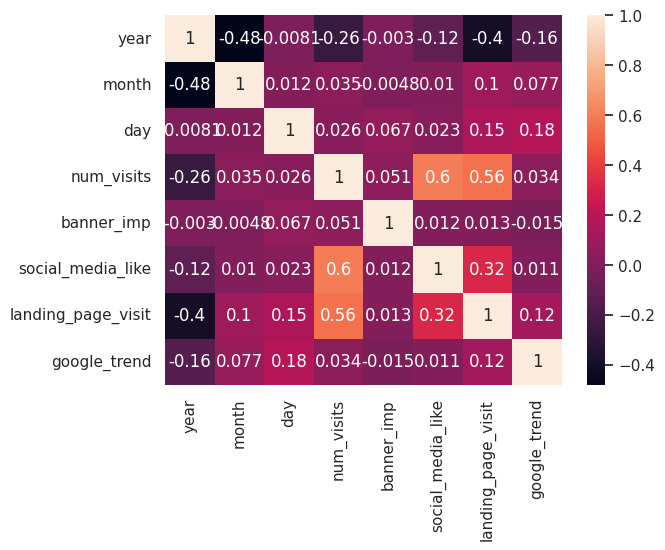

In [40]:
#heatmap of dataframe

sns.heatmap(df.corr(numeric_only=True), annot=True)

In [41]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

df_plot = df.copy()
fig = make_subplots( rows=5, cols=1, subplot_titles=("Store Visits", "Banner Impression", "Social Media Like", "Google Trend", "Landing Page Visit"))

fig.add_trace(go.Scatter(x=df_plot['date'], y=df_plot['num_visits']), row=1, col=1, )
fig.add_trace(go.Bar(x=df_plot['date'], y=df_plot['banner_imp']), row=2, col=1)
fig.add_trace(go.Bar(x=df_plot['date'], y=df_plot['social_media_like']), row=3, col=1)
fig.add_trace(go.Scatter(x=df_plot['date'], y=df_plot['google_trend']), row=4, col=1)
fig.add_trace(go.Scatter(x=df_plot['date'], y=df_plot['landing_page_visit']), row=5, col=1)

fig.update_layout(height=1000, width=1200, title_text="Subway Foot Traffic Dataset")

fig.show()

In [42]:
# prompt: Which months or weeks see the highest and lowest foot traffic?

# To find the months with the highest and lowest foot traffic
df['month'] = df['date'].dt.to_period('M')
monthly_visits = df.groupby('month')['num_visits'].sum().reset_index()
highest_month = monthly_visits.loc[monthly_visits['num_visits'].idxmax()]
lowest_month = monthly_visits.loc[monthly_visits['num_visits'].idxmin()]

print("Month with Highest Foot Traffic:")
print(highest_month)
print("\nMonth with Lowest Foot Traffic:")
print(lowest_month)

# To find the weeks with the highest and lowest foot traffic
df['week'] = df['date'].dt.to_period('W')
weekly_visits = df.groupby('week')['num_visits'].sum().reset_index()
highest_week = weekly_visits.loc[weekly_visits['num_visits'].idxmax()]
lowest_week = weekly_visits.loc[weekly_visits['num_visits'].idxmin()]

print("\nWeek with Highest Foot Traffic:")
print(highest_week)
print("\nWeek with Lowest Foot Traffic:")
lowest_week

Month with Highest Foot Traffic:
month         2019-09
num_visits      29063
Name: 8, dtype: object

Month with Lowest Foot Traffic:
month         2020-02
num_visits      19239
Name: 13, dtype: object

Week with Highest Foot Traffic:
week          2019-09-09/2019-09-15
num_visits                     7661
Name: 36, dtype: object

Week with Lowest Foot Traffic:


,60
week,2020-02-24/2020-03-01
num_visits,3771


# Explore Features: distribution test

As linear models like normally distributed data. The target - Store num_visits is slightly right skewed however is close to normally distributed. we will not need to transform num_visits. However, landing_page_visit is lognomal hence we perform log transformation.

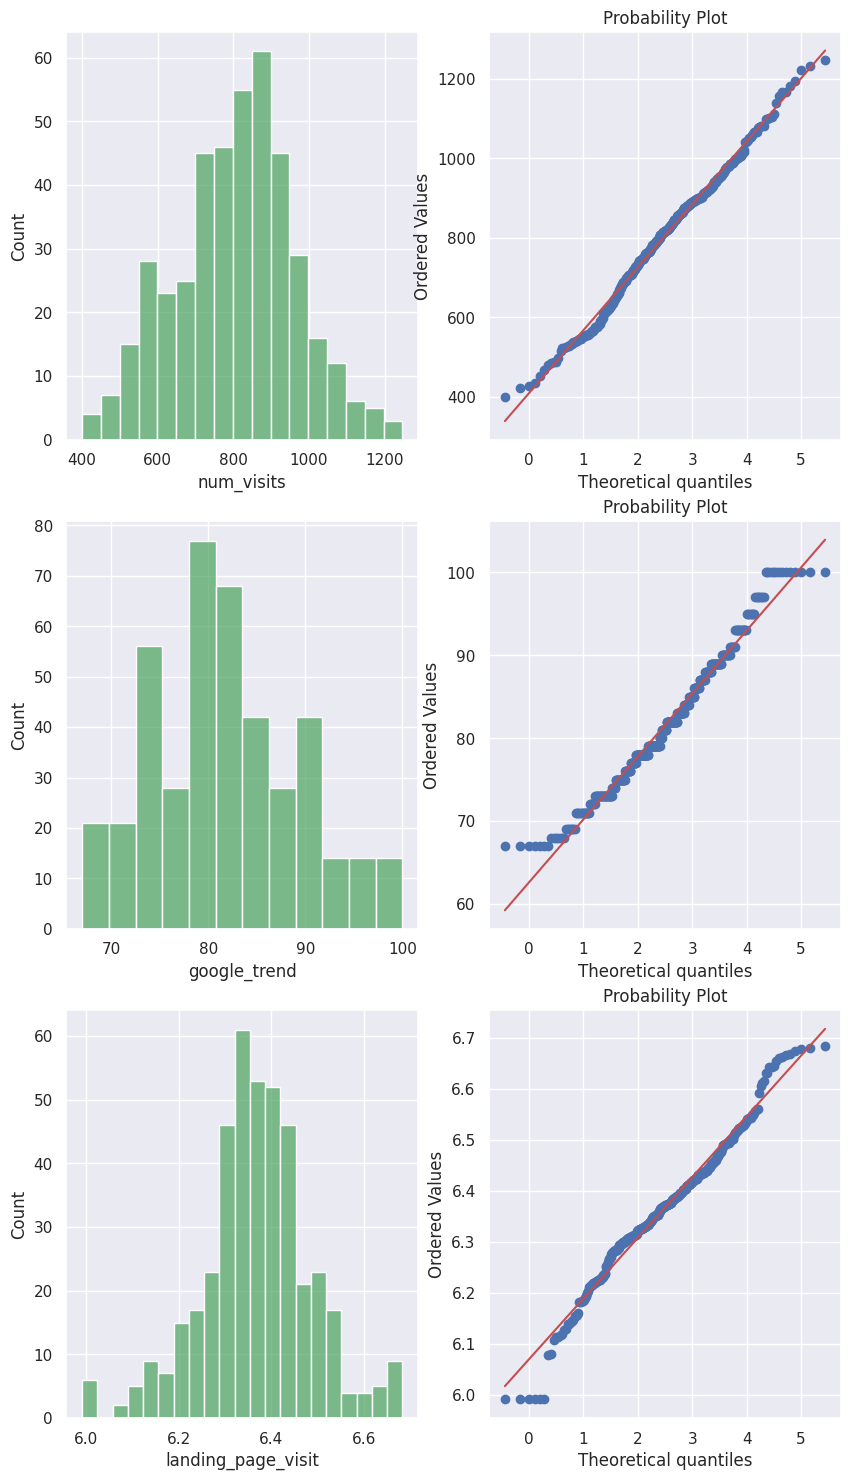

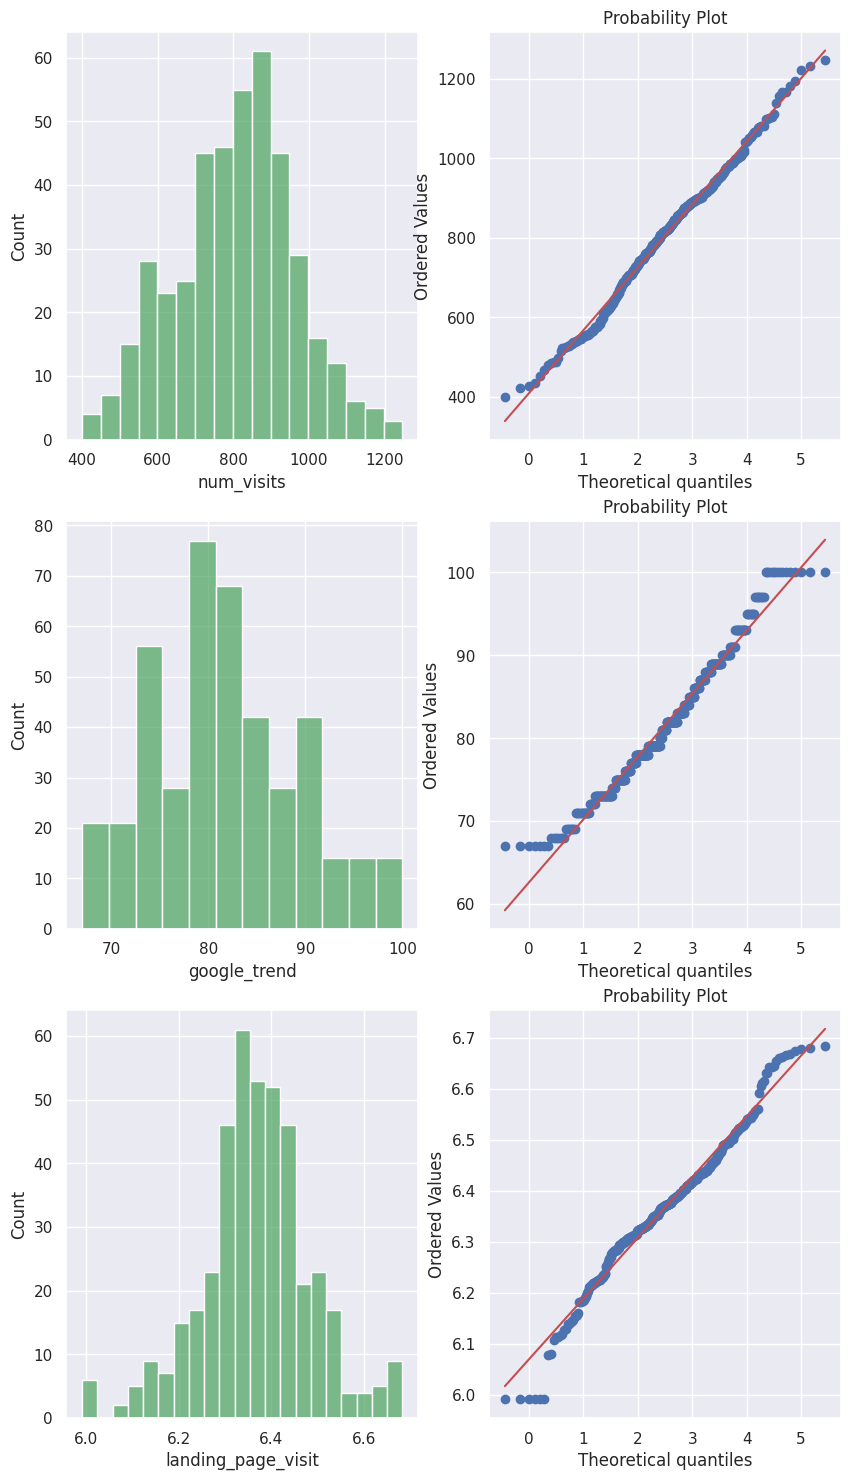

In [43]:


  fig,axes = plt.subplots(ncols=2,nrows=3)
  fig.set_size_inches(10, 18)

  sns.histplot(df_plot['num_visits'], color="g",  ax=axes[0][0], kde_kws={"color": "r", "lw": 1.5, "label": "Normal Distr fit"},)
  stats.probplot(df_plot['num_visits'], dist='norm', sparams=(2.5,),fit=True, plot=axes[0][1])


  sns.histplot(df_plot['google_trend'], color="g",  ax=axes[1][0], kde_kws={"color": "r", "lw": 1.5, "label": "Normal Distr fit"},)
  stats.probplot(df_plot['google_trend'], dist='norm', sparams=(2.5,),fit=True, plot=axes[1][1])

  # log transform
  sns.histplot(np.log(df_plot['landing_page_visit']), color="g",  ax=axes[2][0], kde_kws={"color": "r", "lw": 1.5, "label": "Lognormal fit"},)
  stats.probplot(np.log(df_plot['landing_page_visit']), dist='norm', sparams=(2.5,),fit=True, plot=axes[2][1])

  display(fig)

# ML Model Implementation

“How will the number of visitors (num_visits) change over time, considering the influence of banner impressions, social media likes, landing page visits, and Google search trends?”

In [58]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Feature columns and target
features = ['banner_imp', 'social_media_like', 'landing_page_visit', 'google_trend']
target = 'num_visits'

# Train-test split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print("RMSE: ",rmse)
print("R-sqaure: ",r2)

RMSE:  119.13024237546695
R-sqaure:  0.40909600257873535


Find best parameter for

In [82]:

from sklearn.model_selection import RandomizedSearchCV
# Define features and target

features = ['banner_imp', 'social_media_like', 'landing_page_visit', 'google_trend']
target = 'num_visits'

X = df[features]
y = df[target]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='neg_mean_squared_error',
    n_iter=20,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, best_model.predict(X_train)))
Trainr2 = r2_score(y_train, best_model.predict(X_train))

print("Best Parameters:", random_search.best_params_)
print("train RMSE :",train_rmse )
print("train r2:", Trainr2)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.2f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
train RMSE : 85.0760746424193
train r2: 0.7117074728012085
Test RMSE: 108.45
Test R²: 0.51


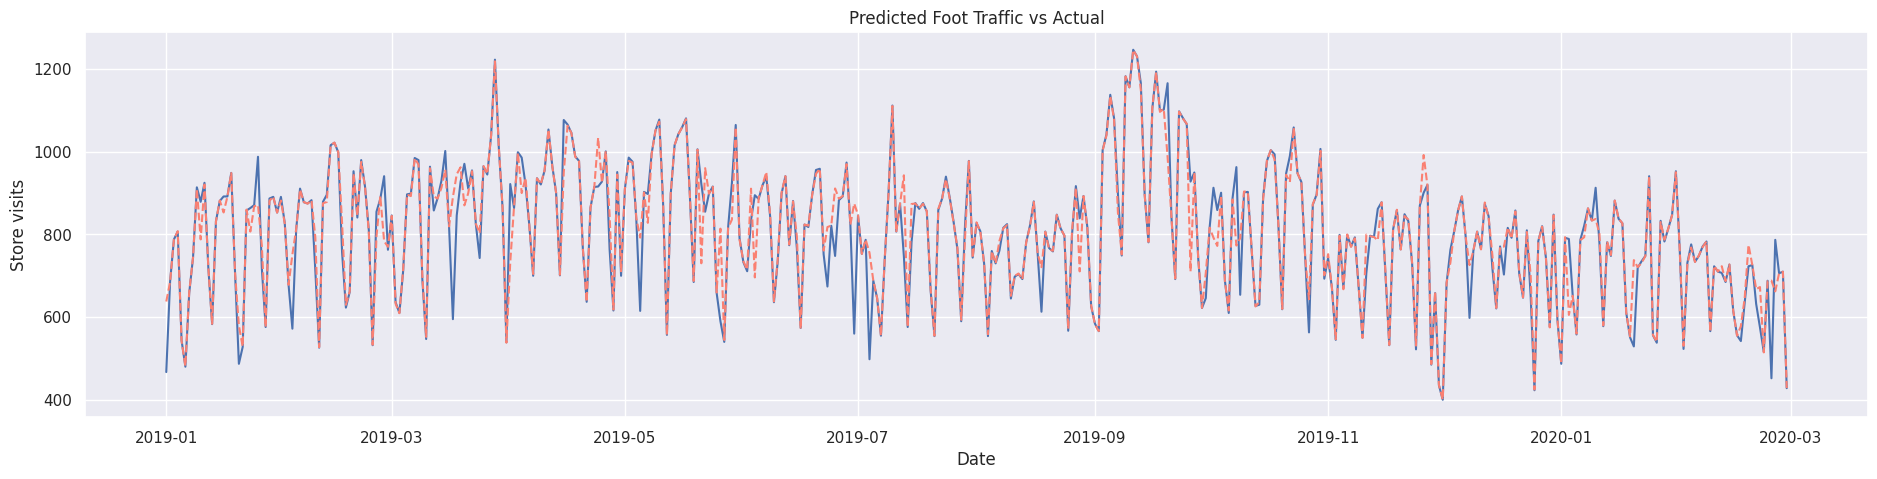

In [76]:

pred = xgb_model.predict(X)
df['pred_num_visits'] = pred

import matplotlib.pyplot as plt

plt.figure(figsize=(23,5))
plt.plot(df.date, df.num_visits)
plt.plot(df.date, df.pred_num_visits, color='salmon', linestyle='--')
plt.title('Predicted Foot Traffic vs Actual')
plt.ylabel('Store visits')
plt.xlabel('Date')
plt.show()


# Use SHAP to inteprate the attribution of each media channel for the in store Foot Traffic

In [77]:
import shap
# load JS visualization code to notebook
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X, y=y.values)

mean_abs_shap = np.absolute(shap_values).mean(axis=0).tolist()



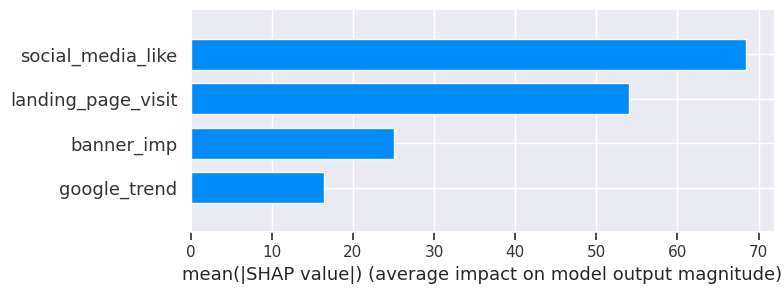

In [78]:
shap.summary_plot(shap_values, X, plot_type="bar")

social media like has more impact on number of visits than landing page visit, banner_imp, google trends.


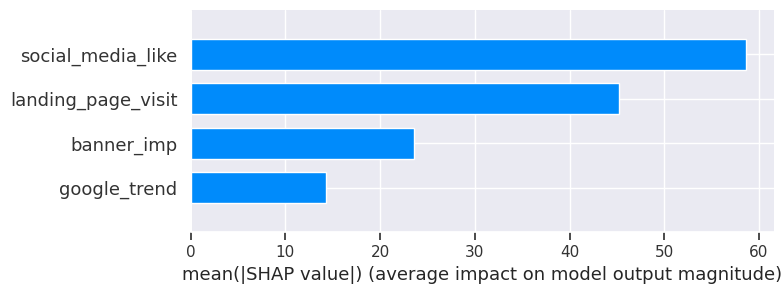

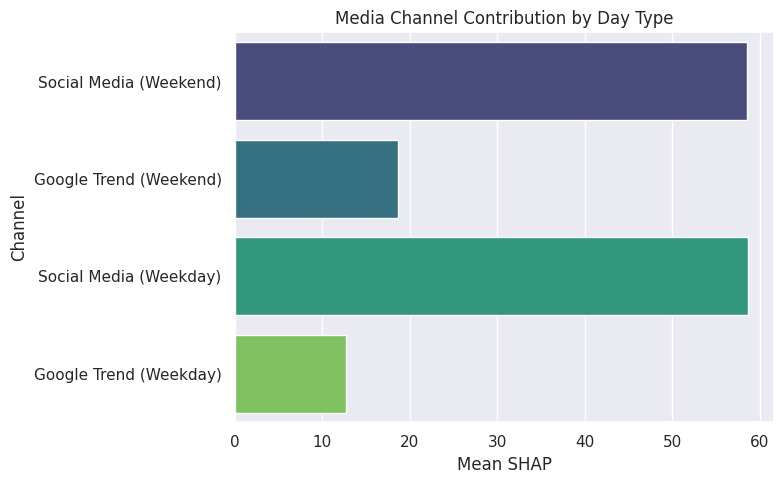

In [84]:
# Optional: add dayofweek if date is available
df['date'] = pd.to_datetime(df['date'])
df['dayofweek'] = df['date'].dt.dayofweek

# Define features and target
features = ['banner_imp', 'social_media_like', 'landing_page_visit', 'google_trend']
target = 'num_visits'

X = df[features]
y = df[target]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_train, y_train)

# SHAP Explanation
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Overall Feature Importance (Bar)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Optional: Compare Social Media vs Google Trend for Weekend vs Weekday
X_test_copy = X_test.copy()
X_test_copy['dayofweek'] = df.loc[X_test.index, 'dayofweek']
X_test_copy['social_media_shap'] = np.abs(shap_values[:, features.index('social_media_like')].values)
X_test_copy['google_trend_shap'] = np.abs(shap_values[:, features.index('google_trend')].values)

weekend = X_test_copy[X_test_copy['dayofweek'].isin([5,6])]
weekday = X_test_copy[~X_test_copy['dayofweek'].isin([5,6])]

summary = pd.DataFrame({
    'Channel': ['Social Media (Weekend)', 'Google Trend (Weekend)', 'Social Media (Weekday)', 'Google Trend (Weekday)'],
    'Mean SHAP': [
        weekend['social_media_shap'].mean(),
        weekend['google_trend_shap'].mean(),
        weekday['social_media_shap'].mean(),
        weekday['google_trend_shap'].mean()
    ]
})

# Bar Plot of Relative Contribution
plt.figure(figsize=(8, 5))
sns.barplot(data=summary, x='Mean SHAP', y='Channel', palette='viridis')
plt.title('Media Channel Contribution by Day Type')
plt.tight_layout()
plt.show()



1.   Social Media (Weekday vs. Weekend)


*   Social media has high SHAP values on both weekdays and weekends.
*   The contribution is slightly higher on weekends, indicating that people are more influenced by social media to visit stores when they have free time.


2.   Google Trends (Weekday vs. Weekend)

*   Google Trends has a lower impact overall compared to social media.
*   Contribution is slightly higher on weekends, but still significantly below social media.








Social Media is consistently the most influential channel in driving in-store traffic, especially on weekends.

Google Trends plays a smaller but still noticeable role, particularly during weekends.

“The SHAP analysis reveals that social media plays a dominant role in driving store visits, particularly during weekends. While Google Trends also contributes, its relative influence is much lower, suggesting that promotional strategies should emphasize social media engagement—especially heading into weekends when customers are more receptive.”